<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h2>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Rentillas_final"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros</p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Direction',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[0])
print(ficheros[0])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Raster/Rentillas_final\Altitud.tif
Tamaño archivos cargados: 2481 x 1875 



Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    if(n == "Distancia_Carreteras" or n == "Geologia" or n == "Orientaciones" or
       n == "Pendiente" or n == "Unidades_Edaficas" or n == "Usos_Del_Suelo"): 
        band = band[1:y, :] 
    elif(n == "Overland_Flow_Direction"):
        band = band[:, :]
    else:
        band = band[1:y, 1:x]      
   
    x_recorte = x - 1
    y_recorte = y - 1
    
    print("Estoy en la capa: ", n, "con Xr: ", x_recorte, " y Yr: ", y_recorte)
    print("Band: ", band.shape)
    
    # Reconstruimos el array con el tamaño de filas x columnas
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1
print("-- Finalizado --")

Estoy en la capa:  Altitud con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Arcillas con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Arenas con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Carbonatos con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Carbono_Organico con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Carcavas con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Curvatura_Perfil con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Curvatura_Plana con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Distancia_Carreteras con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Factor_LS con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Geologia con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Limos con Xr:  2480  y Yr:  1874
Band:  (1874, 2480)
Estoy en la capa:  Orientaciones con Xr:  2480  y Yr:  1874
Band:  (

<hr></hr>

<h2>Tratamiento de datos</h2>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Carcavas'] != -9999]
datos = datos[datos['Altitud'] >= 0 ]
datos = datos[datos['Arcillas'] >= 0]
datos = datos[datos['Carbonatos'] >= 0]
datos = datos[datos['Carbono_Organico'] >= 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Orientaciones'] >= 0]

# Geología
datos.loc[datos.Geologia == 9000, "Geologia"] = "Indiferenciado"
datos.loc[datos.Geologia == 9001, "Geologia"] = "Conglomerados"
datos.loc[datos.Geologia == 9002, "Geologia"] = "Brechas"
datos.loc[datos.Geologia == 9003, "Geologia"] = "Arenas"
datos.loc[datos.Geologia == 9101, "Geologia"] = "Lutitas_Conglomerados"
datos.loc[datos.Geologia == 9102, "Geologia"] = "Lutitas_Dolomias"
datos.loc[datos.Geologia == 9133, "Geologia"] = "Margas"
datos.loc[datos.Geologia == 9134, "Geologia"] = "Areniscas"

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 

Número de datos antes del tratamiento  92950400
Número de datos despues del tratamiento  39552560


<hr>

<h1>Proceso de visualización de datos</h1>

<b>Carcavas</b>

In [9]:
print(datos['Carcavas'].value_counts())

0.0    1961718
1.0      15910
Name: Carcavas, dtype: int64


<b>1. ALTITUD (Continua)</b>

In [10]:
print("Max: " , max(datos.Altitud))
print("Min: " , min(datos.Altitud))
print("Media: " , datos["Altitud"].mean())
print("STD: " , datos["Altitud"].std())

Max:  441.52398681640625
Min:  223.4250030517578
Media:  287.17048722358646
STD:  33.847756652810794


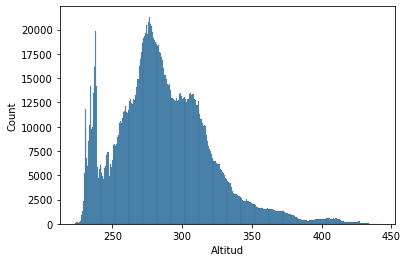

In [11]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>

<b>2. ARCILLAS (Continua)</b>

In [12]:
print("Máximo: ", max(datos.Arcillas))
print("Mínimo: ", min(datos.Arcillas))
print("Media: ", datos["Arcillas"].mean())
print("STD: ", datos["Arcillas"].std())

Máximo:  46.00074768066406
Mínimo:  18.52015495300293
Media:  31.219784083602292
STD:  5.116224583851799


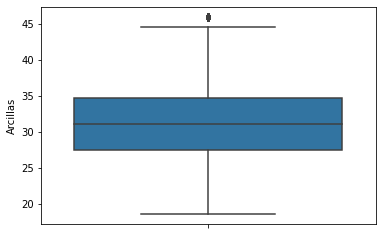

In [13]:
sns.boxplot( y=datos["Arcillas"] );
plt.show()

<hr>

<b>3. ARENAS (Continua)</b>

In [14]:
print("Máximo: ", max(datos.Arenas))
print("Mínimo: ", min(datos.Arenas))
print("Media: ", datos["Arenas"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  51.47105407714844
Mínimo:  10.878837585449219
Media:  32.04763661233303
STD:  7.769929285898242


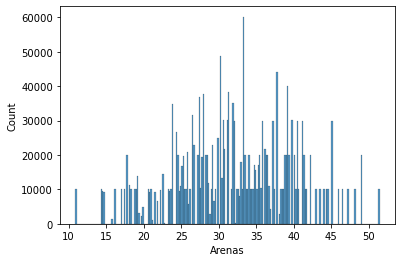

In [15]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>

<b>4. CARBONATOS (Discreta)</b>

In [16]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Carbonatos"].std())

Máximo:  338.4940185546875
Mínimo:  83.9769515991211
Media:  195.39447721580976
STD:  51.10889381740939


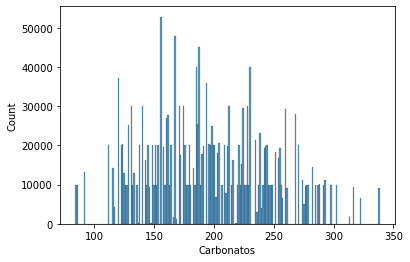

In [17]:
sns.histplot(data=datos, x="Carbonatos")
plt.show()

<hr>

<b>5. CARBONO ORGÁNICO (Continua)</b>

In [18]:
print("Máximo: ", max(datos.Carbono_Organico))
print("Mínimo: ", min(datos.Carbono_Organico))
print("Media: ", datos["Carbono_Organico"].mean())
print("STD: ", datos["Carbono_Organico"].std())

Máximo:  17.23313331604004
Mínimo:  9.726079940795898
Media:  11.37782934095394
STD:  0.9071780014177668


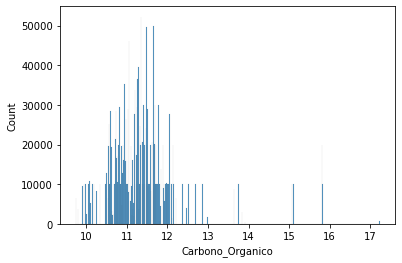

In [19]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>

<b>6. CARCAVAS (Categórica)</b>

0.0    1961718
1.0      15910
Name: Carcavas, dtype: int64


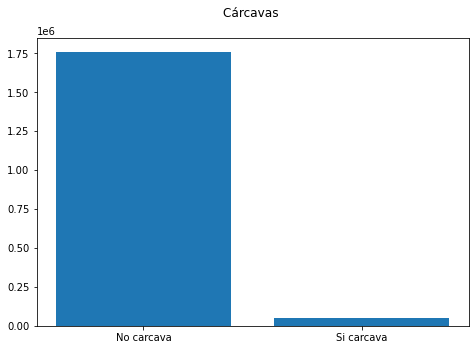

In [20]:
print(datos['Carcavas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['No carcava','Si carcava']
valores = [1760738, 48898]
ax.bar(langs, valores)
plt.title('Cárcavas \n')
plt.show()

<hr>

<b>7. CURVATURA PERFIL (Continua)</b>

In [21]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  0.19945023953914642
Mínimo:  -0.3078397512435913
Media:  -0.00015929158408988336
STD:  0.01173215017599906


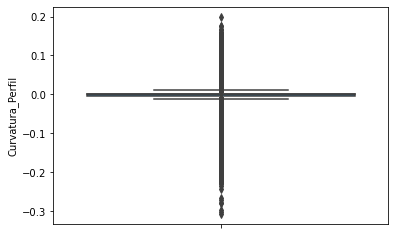

In [22]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

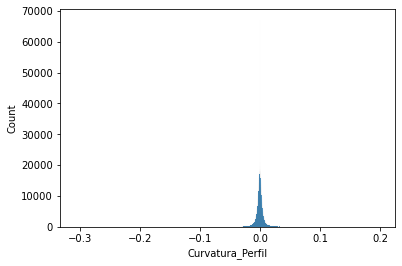

In [23]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>

<b>8. CURVATURA PLANA (Continua)</b>

In [24]:
print(datos.Curvatura_Plana.unique())

[-0.00548648  0.01666399  0.04100581 ... -0.06246004 -0.25134358
 -0.03977901]


In [25]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  53.395469665527344
Mínimo:  -80.98805236816406
Media:  -0.00012578758015215462
STD:  0.3267786302673497


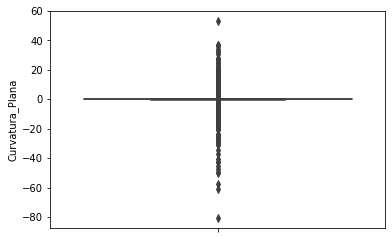

In [26]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>

<b>9. DISTANCIA CARRETERAS (Continua)</b>

In [27]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  2288.427490234375
Mínimo:  0.0
Media:  559.9200128228291
STD:  452.62041801175985


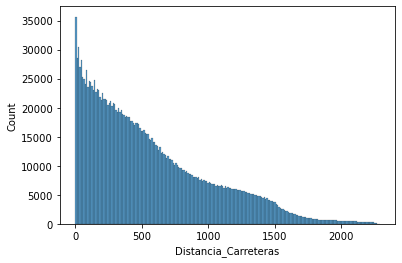

In [28]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>

<b>10. FACTOR LS (Continua)</b>

<hr>

<b>11. GEOLOGIA (Categórico)</b>

In [29]:
print(datos.Geologia.unique())

['Lutitas_Dolomias' 'Conglomerados' 'Areniscas' 'Arenas' 'Indiferenciado'
 'Margas' 'Brechas']


In [30]:
print(datos['Geologia'].value_counts())

Brechas             523612
Areniscas           425500
Margas              408815
Conglomerados       375366
Arenas              237294
Lutitas_Dolomias      6237
Indiferenciado         804
Name: Geologia, dtype: int64


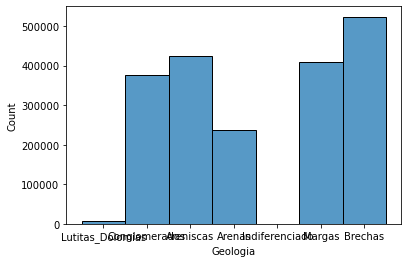

In [31]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>

<b>12. LIMOS (Continua)</b>

In [32]:
print("Máximo: ", max(datos.Limos))
print("Mínimo: ", min(datos.Limos))
print("Media: ", datos["Limos"].mean())
print("STD: ", datos["Limos"].std())

Máximo:  44.68333435058594
Mínimo:  28.224960327148438
Media:  36.73257935619486
STD:  3.3511384633130246


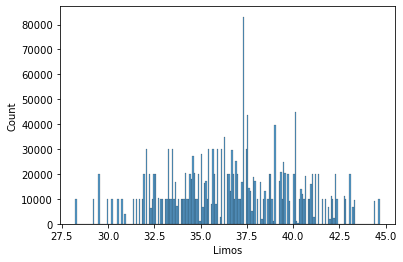

In [33]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>

<b>13. ORIENTACIONES (Categórica)</b>

In [34]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  359.9994812011719
Mínimo:  0.0
Media:  216.01495757578553
STD:  101.46603385146497


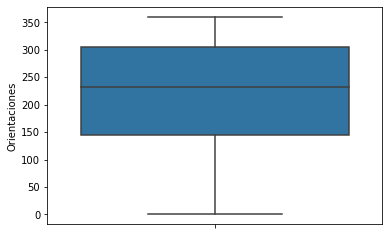

In [35]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

<hr>

<b>14. OVERLAND FLOW DISTANCE (Continua) En este caso DIRECTION</b>

In [36]:
print("Máximo: ", max(datos.Overland_Flow_Direction))
print("Mínimo: ", min(datos.Overland_Flow_Direction))
print("Media: ", datos["Overland_Flow_Direction"].mean())
print("STD: ", datos["Overland_Flow_Direction"].std())

Máximo:  3682.251708984375
Mínimo:  0.0
Media:  867.5259823857631
STD:  710.0710829423277


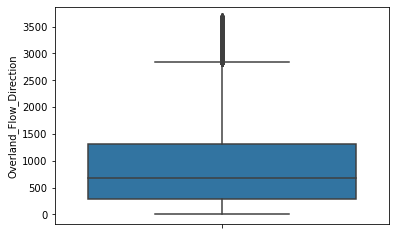

In [37]:
sns.boxplot( y=datos["Overland_Flow_Direction"] );
plt.show()

<hr>

<b>15. PENDIENTE (Continua)</b>

In [38]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  61.09209060668945
Mínimo:  0.0010509368730708957
Media:  4.2673523999282335
STD:  3.9058826350616314


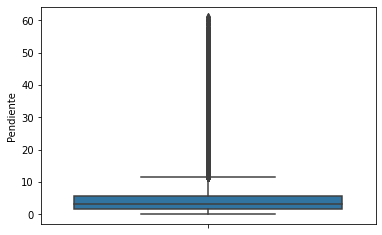

In [39]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>

<b>15. STREAM POWER INDEX (Continua)</b>

In [40]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  59159855104.0
Mínimo:  -5821727744.0
Media:  57581.61065804063
STD:  50300174.83265296


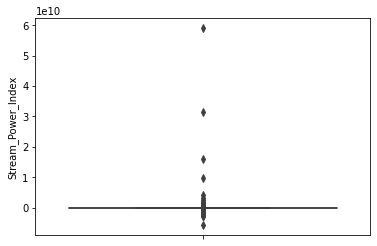

In [41]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>

<b>16. TOPOGRAPHIC POSITION INDEX (Continua)</b>

In [42]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  15.949315071105957
Mínimo:  -18.113468170166016
Media:  0.008721420129500737
STD:  1.4983989869117198


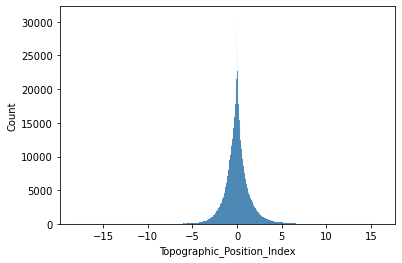

In [43]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>

<b>18. TOPOGRAPHIC WETNESS INDEX (Continua)</b>

In [44]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  24.456628799438477
Mínimo:  -8.859976768493652
Media:  9.390601783961033
STD:  3.9600289253683774


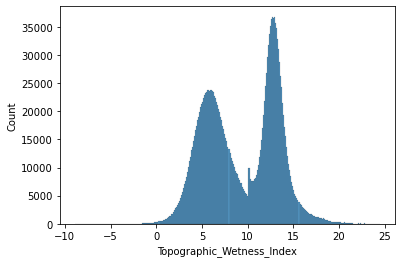

In [45]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>

<b>19. UNIDADES EDÁFICAS (Categórica)</b>

In [46]:
print(datos.Unidades_Edaficas.unique())

[1. 2. 3. 4.]


In [47]:
print(datos['Unidades_Edaficas'].value_counts())

1.0    1529247
3.0     309694
4.0     138667
2.0         20
Name: Unidades_Edaficas, dtype: int64


<hr>

<b>20. USOS DEL SUELO (Categórica)</b>

In [48]:
print(datos.Usos_Del_Suelo.unique())

[5. 3. 2. 4. 1.]


In [49]:
print(datos['Usos_Del_Suelo'].value_counts())

3.0    1641930
4.0     161659
5.0     142557
2.0      30738
1.0        744
Name: Usos_Del_Suelo, dtype: int64


<hr>

<h1>Matriz de correlación de variables</h1>

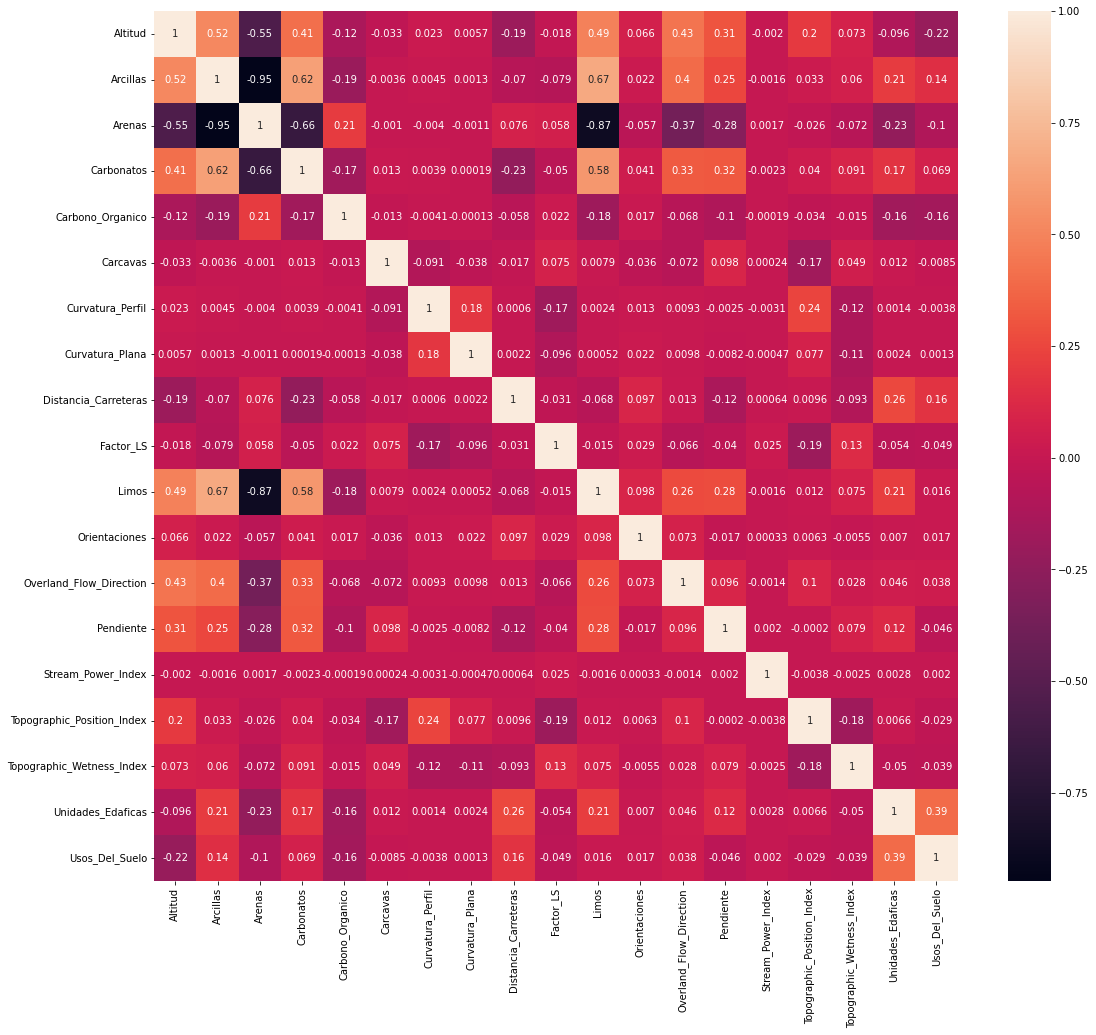

In [50]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()